# Boston Housing Prediction By Using Linear Regression

In [76]:
# importing requried libraries
import numpy as np
import pandas as pd

# Visualization 
import seaborn as sns
import matplotlib.pyplot as plt

In [77]:
# reading the dataset

boston = pd.read_csv(r"D:\jupyter notebook\dataset\Boston_housing\Housing.csv")

In [78]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1.0,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2.0,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2.0,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3.0,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3.0,222,18.7,396.90,5.33,36.2


In [79]:
# Checking the data types , null values  and columns

boston.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [80]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      3
CHAS       0
NOX        2
RM         0
AGE        1
DIS        0
RAD        1
TAX        0
PTRATIO    0
B          0
LSTAT      1
MEDV       0
dtype: int64

In [81]:
# droping the null values 
boston.dropna(inplace=True)

In [82]:
boston.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [83]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

##Attribute Information:

1) CRIM : per capita crime rate by town.
2) ZN : proportion of residential land zoned for lots over 25,000 sq.ft.
3) INDUS: proportion of non-retail business acres per town.
4) CHAS : Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5) NOX : nitric oxides concentration (parts per 10 million).
6) RM : average number of rooms per dwelling.
7) AGE : proportion of owner-occupied units built prior to 1940.
8) DIS : weighted distances to five Boston employment centres.
9) RAD : index of accessibility to radial highways.
10) TAX : full-value property-tax rate per $10,000.
11) PTRATIO : pupil-teacher ratio by town.
12) B : 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
13) LSTAT: % lower status of the population.
14) MEDV : Median value of owner-occupied homes in $1000's.*

In [84]:
# Finding out the correlation between all the columns

relationships = boston.corr()
relationships

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.203316,0.408750,-0.059656,0.420594,-0.222691,0.349304,-0.381240,0.629122,0.586901,0.293932,-0.400727,0.451349,-0.394043
ZN,-0.203316,1.000000,-0.534918,-0.041111,-0.518611,0.315806,-0.574119,0.668100,-0.314910,-0.317756,-0.393349,0.173965,-0.413915,0.362266
INDUS,0.408750,-0.534918,1.000000,0.059530,0.762252,-0.397820,0.644183,-0.708029,0.595299,0.721094,0.385695,-0.353595,0.602322,-0.486076
CHAS,-0.059656,-0.041111,0.059530,1.000000,0.088068,0.091577,0.082903,-0.097021,-0.011646,-0.039511,-0.123075,0.049747,-0.056982,0.176436
NOX,0.420594,-0.518611,0.762252,0.088068,1.000000,-0.309071,0.729396,-0.768811,0.607731,0.665026,0.189201,-0.377229,0.588271,-0.430269
RM,-0.222691,0.315806,-0.397820,0.091577,-0.309071,1.000000,-0.248441,0.210846,-0.218430,-0.299779,-0.361216,0.126875,-0.620750,0.695185
AGE,0.349304,-0.574119,0.644183,0.082903,0.729396,-0.248441,1.000000,-0.748162,0.451386,0.501233,0.268043,-0.269633,0.599543,-0.380341
DIS,-0.381240,0.668100,-0.708029,-0.097021,-0.768811,0.210846,-0.748162,1.000000,-0.494262,-0.533427,-0.234633,0.288274,-0.495115,0.251706
RAD,0.629122,-0.314910,0.595299,-0.011646,0.607731,-0.218430,0.451386,-0.494262,1.000000,0.911172,0.468927,-0.440059,0.485812,-0.384828
TAX,0.586901,-0.317756,0.721094,-0.039511,0.665026,-0.299779,0.501233,-0.533427,0.911172,1.000000,0.466398,-0.437053,0.541042,-0.470993


<Axes: >

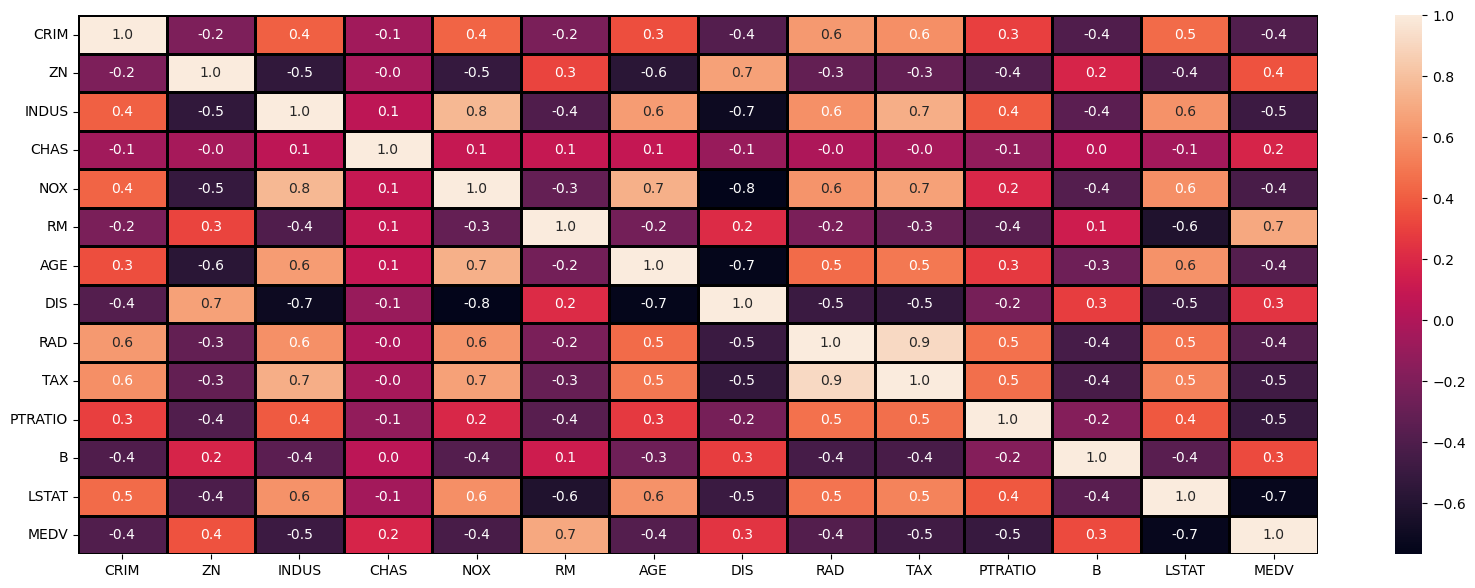

In [85]:
# Visualization 
plt.figure(figsize=(20,7))

sns.heatmap(relationships , linecolor='black' , linewidths=1 , annot=True, fmt=".1f")

In [86]:
# feature selection 

#Independent variable.
## RM has a good correlation with MEDV
### LSTAT has a negative correlation with MEDV (Inversely proporational)

features = boston[['RM' , 'LSTAT']]
features

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33
...,...,...
504,6.593,9.67
505,6.120,9.08
506,6.976,5.64
507,6.794,6.48


In [87]:
# Dependent variable
target = boston['MEDV']
target

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
504    22.4
505    20.6
506    23.9
507    22.0
508    11.9
Name: MEDV, Length: 501, dtype: float64

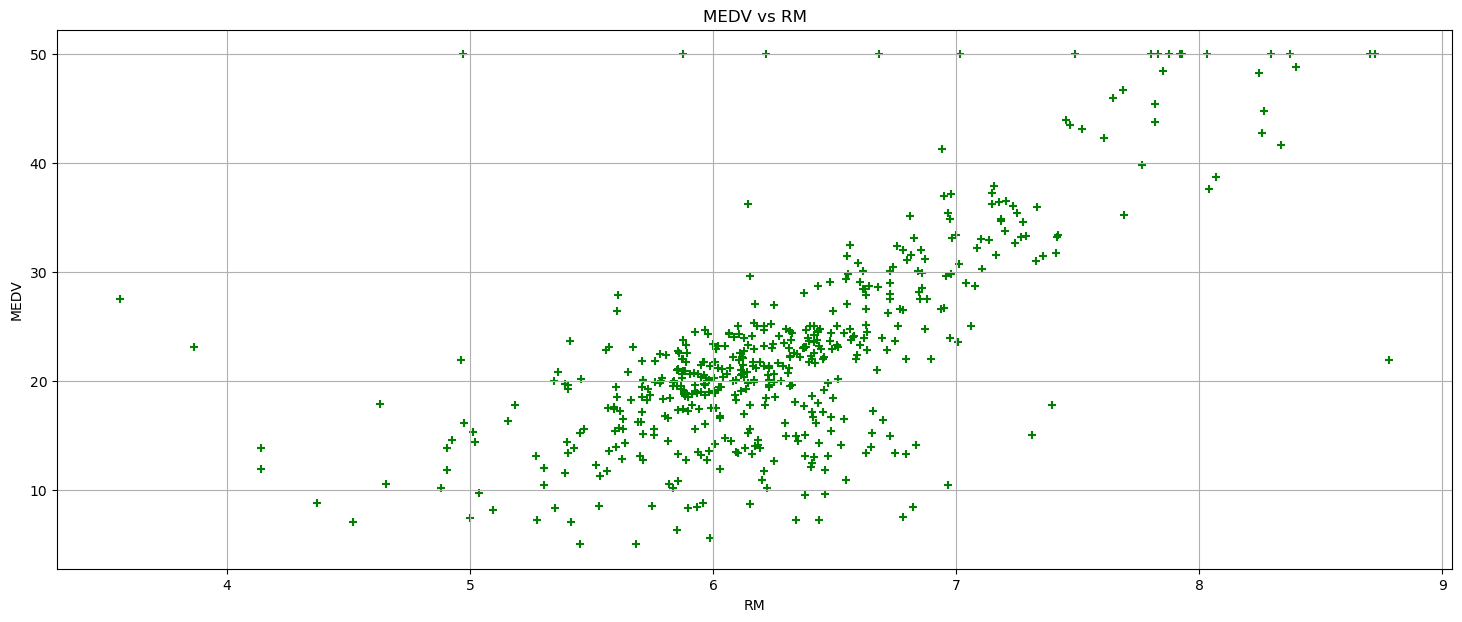

In [88]:
# visualization of MEDV vs RM
## As value of RM increases , also it increases the value of MEDV due to the postive or good correlation between them.
plt.figure(figsize=(18,7))
plt.scatter(features.iloc[:,0] , target , marker='+' , color="green")
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title("MEDV vs RM")
plt.grid()
plt.show()

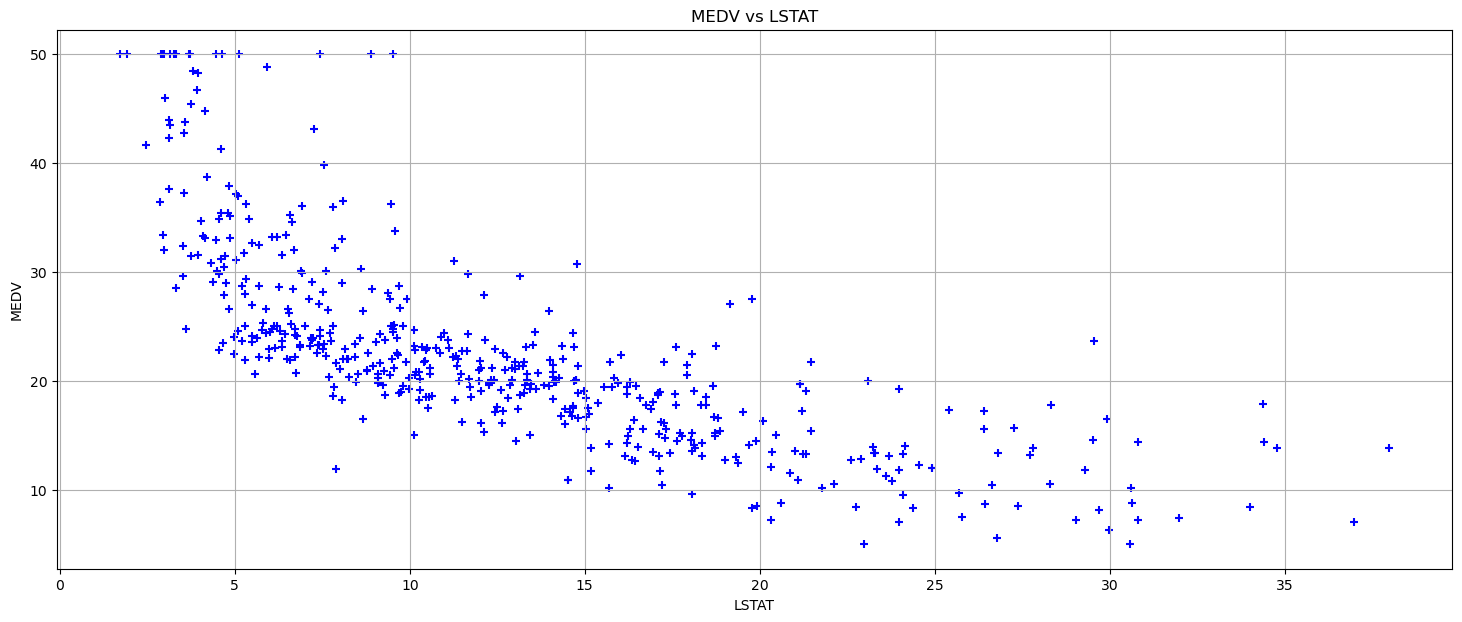

In [89]:
# visualization of MEDV vs LSTAT
## As value of LSTAT increases ,  it decreases the value of MEDV due to the negative correlation between them.
plt.figure(figsize=(18,7))
plt.scatter(features.iloc[:,1] , target , marker='+' , color="blue")
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title("MEDV vs LSTAT")
plt.grid()
plt.show()

In [90]:
# Spliting the data into training and test datasets.

from sklearn.model_selection import train_test_split

In [91]:
# initalizing the variables by putting values in it 
## features are independent variables.
## target is dependent variable.

X = features
Y = target

# checking the shape of the X and Y variable.
print(f"Shape of the X is :  {X.shape}")
print(f"Shape of the Y is : {Y.shape}")


#Spliting the data into multiple training and testing data.
X_train , X_test , Y_train , Y_test = train_test_split(X,Y , test_size=0.2 , random_state=5)

#Checking the shape of the training and testing dataset
print('-' * 20)
print(f"Shape of the X_train is : {X_train.shape}")
print(f"Shape of the X_test is : {X_test.shape}")
print(f"Shape of the Y_train is : {Y_train.shape}")
print(f"Shape of the Y_test is : {Y_test.shape}")


Shape of the X is :  (501, 2)
Shape of the Y is : (501,)
--------------------
Shape of the X_train is : (400, 2)
Shape of the X_test is : (101, 2)
Shape of the Y_train is : (400,)
Shape of the Y_test is : (101,)


In [92]:
# Applying the Linear Regression Model

## importing the library

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

In [93]:
# initalizing the variable.

reg_model = LinearRegression()

In [94]:
reg_model.fit(X_train , Y_train)

LinearRegression()

In [95]:
# Model evaluatiion for training dataset.

print("\n")
print("Model Evaluation for training dataset : ")
print("-"*40)

predictions = reg_model.predict(X_train)
print(f"Predicted value (X_train) is : {predictions}")

# Root Mean Squared Error
rmse = (np.sqrt(mean_squared_error(Y_train , predictions)))
print('-'*20)
print(f"Root Mean Squared error is : {rmse}")

# R2 score 
r2 = r2_score(Y_train , predictions)
print("-"*20)
print(f"R2 score is : {r2}")



Model Evaluation for training dataset : 
----------------------------------------
Predicted value (X_train) is : [20.21947502 16.74824973 13.65883499  1.74182409 16.42861093 12.86888634
 28.03515911  5.02676663  7.20820505 20.54310531 18.56098662 23.97719588
 26.30501831 18.39438091 23.28630911 22.22992755 27.53444158 21.06924856
 15.99964937 17.85651965 19.84759377 29.60760008 28.06467088 40.11692846
 26.66496849 19.05695186 13.67356611 17.81750472 29.49563324 20.27847155
 24.19212461 27.68247471 31.1049013   7.92925632 28.42442149 20.54242106
 22.85624308 16.66480728 19.52362432 29.08264378 27.38708369 23.98134497
 31.42297347 16.73858754 11.25597638 -4.47520997 21.70447756 25.54825485
 36.91177747 25.59256529 32.67493236 31.60411524 33.72022019 13.71948964
 23.82463254 22.3456593  23.4956617  12.70358608 18.69155306 27.29353489
 23.86869839 24.09445824 35.1126388  18.99466302 22.58835612 18.76207705
 15.36371811 26.95693518 25.23618946 27.97118063 14.63837672 28.34982046
 -1.75284

In [96]:
# Model evaluatiion for testing dataset.

print("\n")
print("Model Evaluation for testing dataset : ")
print("-"*40)

predictions = reg_model.predict(X_test)
print(f"Predicted value (X_test) is : {predictions}")

# Root Mean Squared Error
rmse = (np.sqrt(mean_squared_error(Y_test , predictions)))
print('-'*20)
print(f"Root Mean Squared error is : {rmse}")

# R2 score 
r2 = r2_score(Y_test , predictions)
print("-"*20)
print(f"R2 score is : {r2}")



Model Evaluation for testing dataset : 
----------------------------------------
Predicted value (X_test) is : [29.55866036 15.23240437 33.58257853 19.05734648 22.37642557 14.7162985
 24.28977297 30.22580655 18.02661723 22.90434853 18.49963563 28.92248901
 23.51648967 21.50088715 23.86541959 26.24108036 17.34859038 26.51800972
 25.3685176  16.1672965  22.35802553 30.56102426 19.33515372 32.0891728
 20.48998497 36.14341758 18.090075   22.60202639 14.49044858 27.5007627
 18.27901676 11.1130347  22.18842165 22.93531436 18.84556145 26.28341603
 20.18239884 26.31788724 21.69956766 29.7417859  26.42876313 26.91883559
 22.70084818 28.00342347 36.75819522  9.32569651 18.35682004 22.91257467
 31.56566155 22.65918775  1.25160161 40.41999339 13.72293198 23.77838335
 19.15358581 29.69336689 28.79605816 31.3692004  24.06757395 23.20007563
 25.39481362 25.5419044  18.94565125 19.13298443 18.55635734 20.28660621
 19.95972415 28.54436989 17.7107329  19.70405932 31.67542254 20.94065689
 30.97264522 1